**Objective**
<br>To leverage the real-time sensor data in detecting potential water supply failures and take quick action to reduce water usage disruption.

Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import random
from sklearn.model_selection import train_test_split
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path=os.path.join(os.getcwd(),'drive','MyDrive','Colab Notebooks','sensor.csv')
input_df=pd.read_csv(file_path)


Exploratory Data Analysis

In [ ]:
print(input_df.shape)

(220320, 55)


In [ ]:
print(input_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [ ]:
input_df.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,220301.000000,220301.000000,220301.000000,220301.000000,220299.000000,0.0,220289.000000,220274.000000,220274.000000,220304.000000,220304.000000,220304.000000,220279.000000,220304.000000,220304.000000,220284.000000,220300.000000,220304.000000,220304.000000,220248.000000,220059.000000,220304.00000,220252.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,41.470339,41.918319,29.136975,7.078858,376.860041,NaN,416.472892,421.127517,2.303785,590.829775,360.805165,796.225942,459.792815,922.609264,556.235397,649.144799,786.411781,501.506589,851.690339,576.195305,614.596442,863.32310,804.283915,486.405980,234.971776,427.129817,593.033876,60.787360,49.655946,36.610444,68.844530,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,12.093519,13.056425,10.113935,6.901755,113.206382,NaN,126.072642,129.156175,0.765883,199.345820,101.974118,226.679317,154.528337,291.835280,182.297979,220.865166,246.663608,169.823173,313.074032,225.764091,195.726872,283.54476,260.602361,150.751836,88.376065,141.772519,289.385511,37.604883,10.540397,15.613723,21.371139,7.898665,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,0.000000,0.000000,0.000000,0.000000,32.409550,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,95.527660,0.000000,0.000000,0.000000,0.000000,43.154790,0.000000,4.319347,0.636574,0.000000,23.95833,0.240716,6.460602,54.882370,0.000000,2.260970,0.000000,24.479166,19.270830,23.437500,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,40.705260,38.856420,28.686810,1.538516,418.103250,NaN,459.453400,454.138825,2.447542,662.768975,398.021500,875.464400,478.962600,950.922400,601.151050,693.957800,790.489575,448.297950,782.682625,518.947225,627.777800,839.06240,760.607475,489.761075,172.486300,353.176625,288.547575,28.799220,45.572910,32.552080,57.812500,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,44.291340,45.363140,32.515830,2.929809,420.106200,NaN,462.856100,462.020250,2.533704,665.672400,399.367000,879.697600,531.855900,981.925000,625.873500,740.203500,861.869600,494.468450,967.279850,564.872500,668.981400,917.70830,878.850750,512.271750,226.356050,473.349350,709.668050,64.295485,49.479160,35.416660,66.406250,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160

Checking for Missing values

In [ ]:
print(input_df.isnull().sum())

Unnamed: 0             0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


Removing the columns which have maximum number of empty cells

In [ ]:
input_df.drop(['Unnamed: 0', 'timestamp','sensor_00','sensor_15','sensor_50','sensor_51'],axis=1, inplace=True)

Since the sensor data has many empty cells, which could be due to mal-function or network connectivity, if there is no flow of water we see zero in the dataset and we found so many empty cells as shown above we will fill it with mean values

In [ ]:
for column in input_df.columns:
  if 'sensor' in column:
    try:
      temp_mean=input_df[column].mean()
    except:
      temp_mean=0
    if np.isnan(temp_mean):
      temp_mean=0
    
    input_df[column].replace(np.nan,temp_mean,inplace=True)
    

Testing if we are able to fill all the null values in the dataset

In [ ]:
print(input_df.isnull().sum())

sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
machine_status    0
dtype: int64


Checking for duplicate data - Since we have so many records we need to check if there exists any duplicate data. Upon executing below statement we can check the count of duplicate reports

In [ ]:
target_df=input_df['machine_status']
#input_df.drop(['machine_status'],axis=1,inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdedb7c84d0>,
      dtype=object)

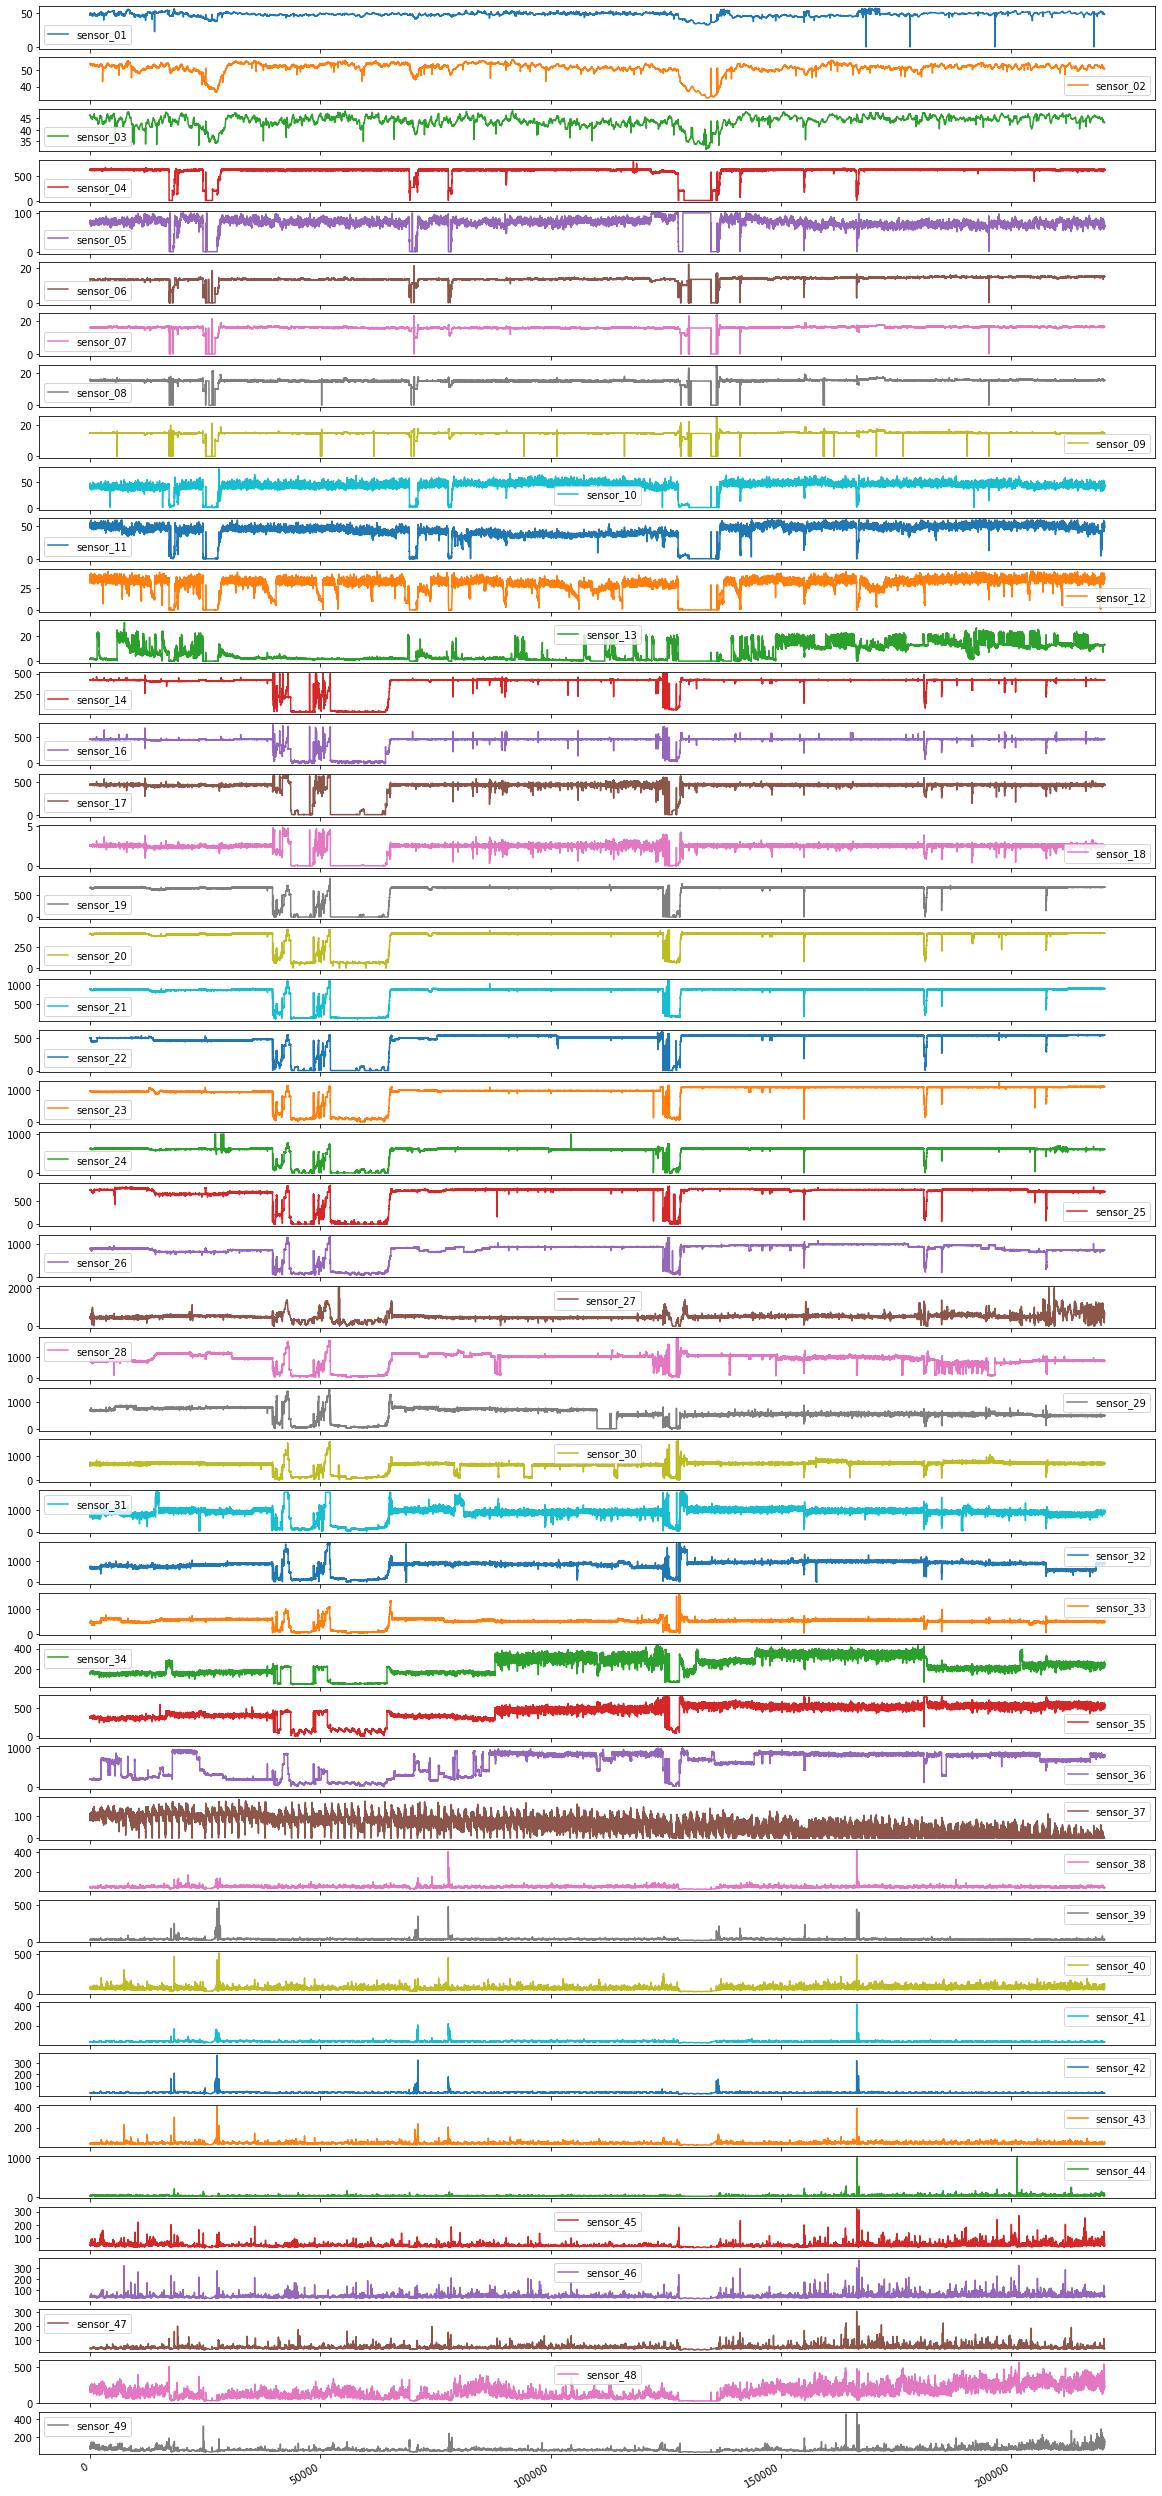

In [ ]:
import matplotlib.pyplot as plt
input_df.plot(subplots =True, sharex = True, figsize = (20,50))

Through the above visualization, we can see some patterns in the set of sensors below. In order to improve the efficiency we can create a model for each pattern and deploy
(1,2,3),
(4,5,6,7,8,9),
(10,11,12),
(14,16,17,18),
(19,20,21,22,23,24),
(25,26,28,29,30,31,32,33),
(34,35),
(38,39,40,41,42,43,45,46,47).

In [ ]:
import numpy as np
conditions = [(input_df['machine_status'] =='NORMAL'), (input_df['machine_status'] =='BROKEN'), (input_df['machine_status'] =='RECOVERING')]
choices = [1, 0, 0.5]
input_df['Operation'] = np.select(conditions, choices, default=0)

Let us take a set (4,5,6,7,8,9)

In [ ]:
df_set1 = pd.DataFrame(input_df, columns=['Operation','sensor_04', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdedb927b90>,
      dtype=object)

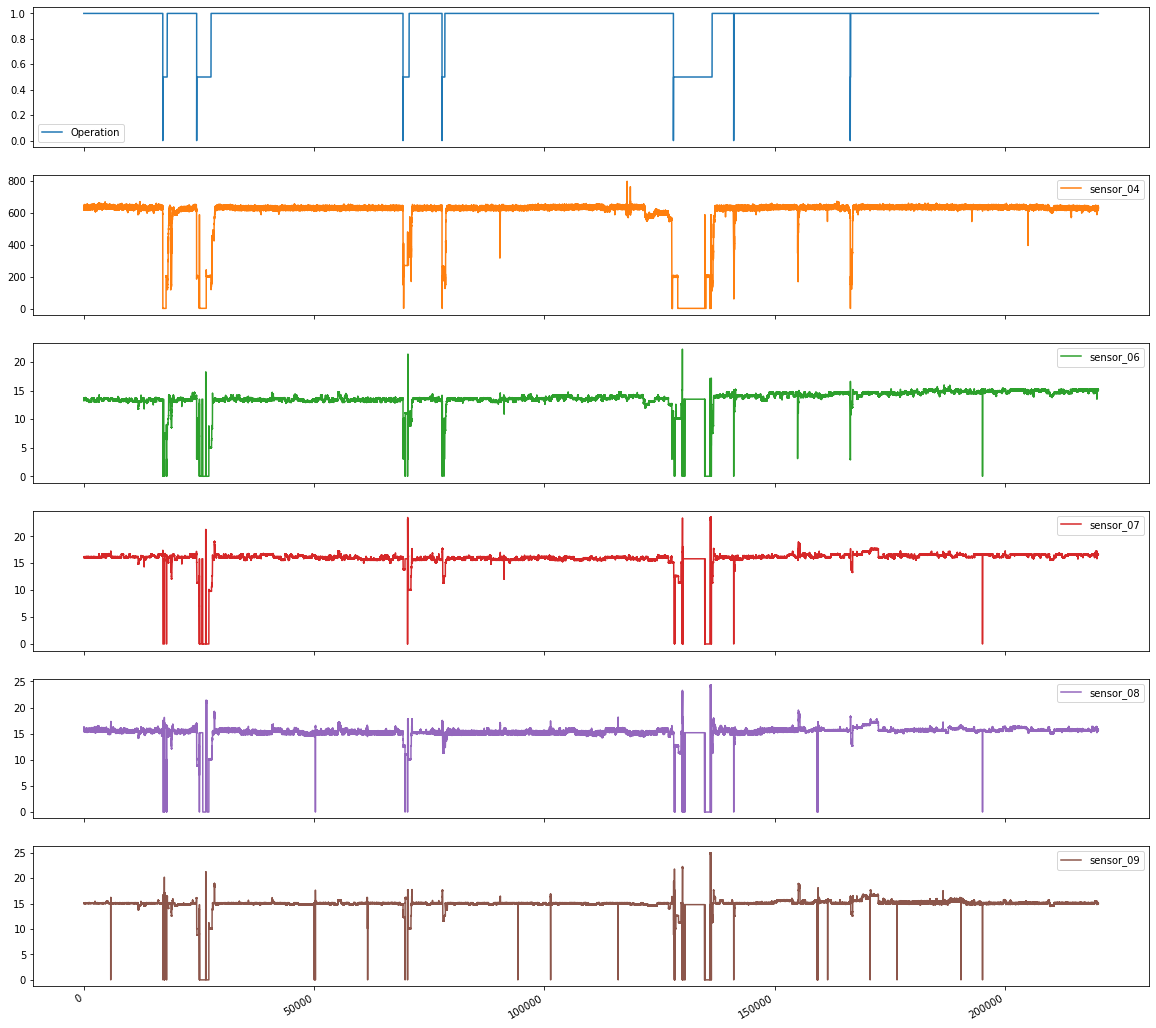

In [ ]:
df_set1.plot(subplots =True, sharex = True, figsize = (20,20))

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [ ]:
from sklearn.preprocessing import MinMaxScaler

values = df_set1.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_set1.shape[1]+1, 2*df_set1.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series.
values = reframed.values
n_train_time = 50000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

Epoch 1/50
715/715 - 7s - loss: 0.0321 - val_loss: 0.0026
Epoch 2/50
715/715 - 5s - loss: 0.0050 - val_loss: 0.0022
Epoch 3/50
715/715 - 5s - loss: 0.0045 - val_loss: 0.0020
Epoch 4/50
715/715 - 5s - loss: 0.0042 - val_loss: 0.0021
Epoch 5/50
715/715 - 5s - loss: 0.0040 - val_loss: 0.0021
Epoch 6/50
715/715 - 5s - loss: 0.0039 - val_loss: 0.0021
Epoch 7/50
715/715 - 5s - loss: 0.0038 - val_loss: 0.0021
Epoch 8/50
715/715 - 5s - loss: 0.0036 - val_loss: 0.0020
Epoch 9/50
715/715 - 5s - loss: 0.0034 - val_loss: 0.0020
Epoch 10/50
715/715 - 5s - loss: 0.0032 - val_loss: 0.0018
Epoch 11/50
715/715 - 5s - loss: 0.0031 - val_loss: 0.0017
Epoch 12/50
715/715 - 5s - loss: 0.0029 - val_loss: 0.0017
Epoch 13/50
715/715 - 5s - loss: 0.0026 - val_loss: 0.0016
Epoch 14/50
715/715 - 5s - loss: 0.0024 - val_loss: 0.0014
Epoch 15/50
715/715 - 5s - loss: 0.0022 - val_loss: 0.0014
Epoch 16/50
715/715 - 5s - loss: 0.0019 - val_loss: 0.0013
Epoch 17/50
715/715 - 5s - loss: 0.0017 - val_loss: 0.0011
Epoch 

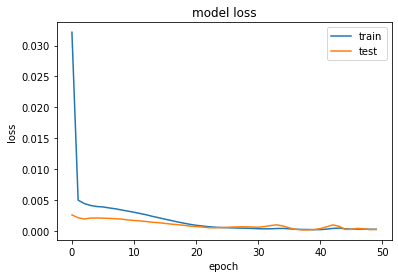

Test RMSE: 0.017


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_set1.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)